 ## Сборный проект

Мы работаем  в интернет-магазине, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Изучим данные, переданные нам для работы и загрузим необходимые библиотеки. Поправим наименования колонок, изменим типы данных на корректные, заполним пропуски.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

Считаем файл и сохраним его в соответствующем датасете

In [2]:
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv('/Users/romanvasyliev/Downloads/games.csv')

### Проверка данных

In [3]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выясним долю отсутствующих даных

In [4]:
games.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Как видим данные оценок пользователей, критиков и рейтинги игр заполнены на 50%-60%, остальные данные в наличии в достаточном количестве. Посмотрим  какие значения содержатся в датасете, типы данных и наименования столбцов.

In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Заметим что наименования столбцов происходят с заглавной буквы, типы данных соответсвуют содержанию, кроме одного столбца User_Score, его значения мы приведем к типу данных float64

### Предобработка данных

Приведем все буквы в названиях столбцов к нижнему регистру

In [6]:
games.columns = games.columns.str.lower()

Посмотрим на данные по играм с пропущенными значениями например по колонке critic_score

In [7]:
games[games['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Очень много отсутствующих значений в играх не только старых, по году выпуска, но и достаточно новых. Данные пропущены по столбцам оценок и пользователей и критиков и рейтингу, в тоже время по этим играм присутствуют остальные данные, продажи в различных регионах,годы выпуска, жанр и рейтинг. Мы не можем удалить такие данные, так же как и применить среднее значение или медиану, все игры уникальные и заменив значения мы можем исказить статистику, поэтому будем заменять данные с пропусками на индикаторное значение -1, которое в процессе исключать из анализа.

In [8]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)
games['rating'] = games['rating'].fillna(-1)

Проверим какие уникальные значения содержатся в данных по рейтингам

In [9]:
games['critic_score'].unique()

array([76., -1., 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
games['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [11]:
games['rating'].unique()

array(['E', -1, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

В данных пользовательских оценок есть значение 'tbd', погуглив можно узнать, что такое значение ставится для игр, у которых меньше 4 оценок пользователей. Пользователи не всегда охотно оставляют отзывы и проставляют рейтинги играм, а для не сильно популярных игр или жанров статистика получения обратной связи еще хуже, а если игра выходит на платформе, на которой не было возможности ставить рейтинг или эта игра вышла когда платфора теряла свою популярность, вариантов отсутствуюших значений оценок много, и чтобы данные по оценкам были корректными скорее всего ввели такое ограничение - 4 оценки чтобы получить средний рейтинг для игры. 

Причиной пропусков могут быть разные вещи, например год образования рейтингового агентства позже выхода игр, или в эти игры уже давно не играют, или же пользователи не посещают данный сайт с отзывами, у японских игроков наверняка есть свои рейтинговые агентства 

In [12]:
games[games['user_score']=='tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,-1.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,-1.0,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,-1.0,tbd,E


Сохраним в датасет tbd данные с  ['user_score']=='tbd', вполне возможно они нам пригодятся в будущем

In [13]:
tbd = games[games['user_score']=='tbd']

Удалить или заменить такие значения мы так же не можем - заменим tbd каким-нибудь индикаторных значением -1. И приведем тип данных к корректному

In [14]:
games['user_score'] = games['user_score'].replace('tbd' , -1)
games['user_score'] = games['user_score'].astype('float64')

Посмотрим на уникальные значения по столбцам genre, platform и пропуски в name

In [15]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Есть пропуски, посмотрим сколько их

In [16]:
games[games['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,-1
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,-1


In [17]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [18]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,-1
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,-1


In [19]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Видим, что пропуски по столбцам genre и name совпадают - мы могли бы удалить эти 2 строки - но в них присутствуют данные по продажам и эти данные нам нужны, оставляем эти пропуски без изменений. Отсутствуещее значение года выпуска так же заменим на индикаторное значение -1 

In [20]:
games['year_of_release'] = games['year_of_release'].fillna(-1)

## Расчёты и добавление результатов в таблицу

Создадим столбец total_revenue - суммарные продажи во всех регионах

In [21]:
games['total_revenue'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

Заменим коды классификации ESRB на более понятные (данные из Вики) и добавим столбец с данными. Создадим словарь и применим функцию map для замены значений и возврата более понятного из словаря для нового столбца

In [22]:
ESRB_dict = {'E': 'Для всех', 'M': 'От 17 лет', 'T': '13-17 лет', 'E10+': 'от 10 лет и старше',\
             
             'K-A': 'Для детей и взрослых(устар.)', 'AO':'Только для взрослых', \
             
             'EC':'Для детей младшего возраста','RP':'Рейтинг ожидается', -1:'Рейтинг отсутствует'}

games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

## Исследовательский анализ данных

### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Сгруппируем данных по столбцу year_of_release, отфильтровав индикаторные значения и построим гистограмму с помощью метода plot

In [23]:
# создадим датасет с уникальными названиями игр 
wo_dublicates_game_names = games.drop_duplicates(subset='name')

Text(0, 0.5, 'Количество игр')

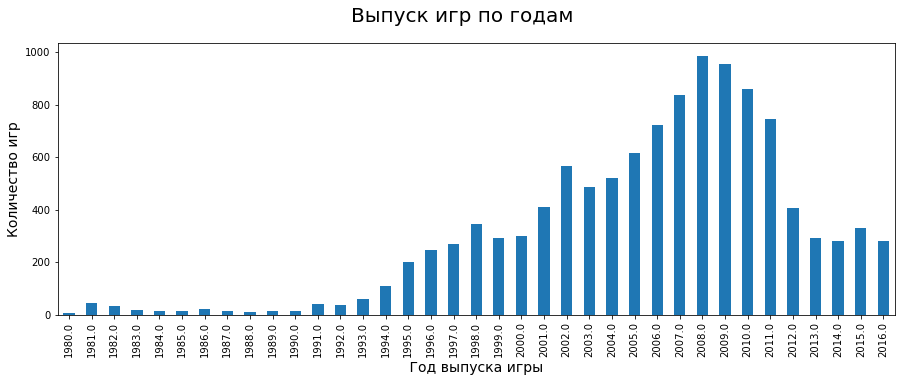

In [24]:
wo_dublicates_game_names.query('year_of_release>0')\
                        .groupby(by='year_of_release')\
                        .count()['name']\
                        .plot(kind='bar',figsize=(15,5))
plt.suptitle('Выпуск игр по годам', fontsize=20)
plt.xlabel(' Год выпуска игры ',fontsize=14 )
plt.ylabel('Количество игр',fontsize=14)


Как видим количество игр до 1991 года было относительно стабильным, но в 1991 году появляется первый 3D движок и начинается бурный рост развития шутеров и других 3D игр, которые очень понравились пользователям. После 2011 года видим спад выпуска игр, связанный скорее всего с разитием мобильных технологий и увеличенную концентрацию производителей игр на смартфоны и планшеты. Пик продаж игр пришелся на года 2008-2009.

### Продажи игр по платформам

Взглянем как менялись продажи по платформам за весь период датасета

Text(0, 0.5, 'Количество игр шт.')

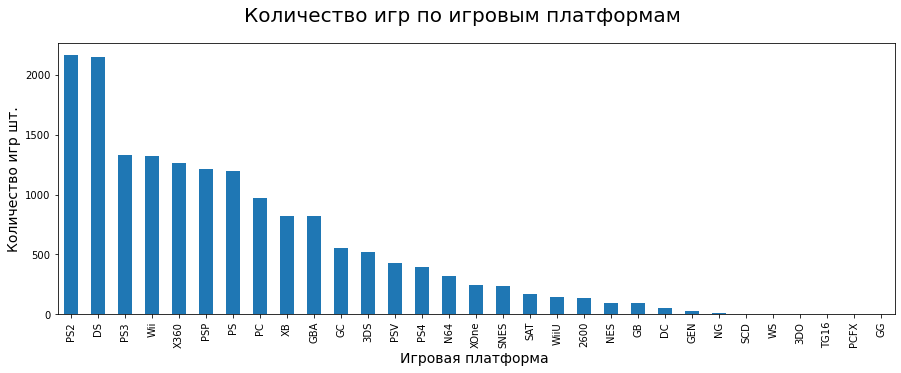

In [25]:
games.groupby(by='platform')['name'].count().sort_values(ascending=False).plot(kind='bar',figsize = (15,5))
plt.suptitle('Количество игр по игровым платформам', fontsize=20)
plt.xlabel('Игровая платформа ',fontsize=14 )
plt.ylabel('Количество игр шт.',fontsize=14)

Основными платформами по количеству  игр были PS2, Nintendo DS, основные же производители платформ - это PlayStation, Nintendo, Microsoft. Японские производители приставок лидируют по количеству производимых для них игр, замыкает японскую пятерку лидеров платформа из америки Microsoft X360

Text(0, 0.5, 'Количество игр шт.')

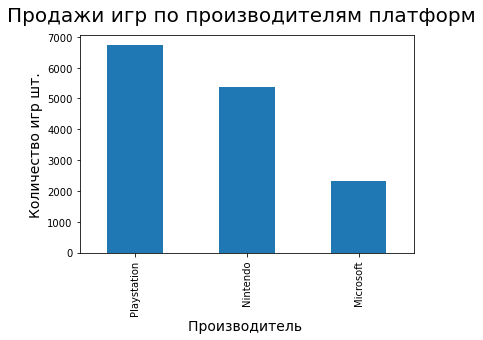

In [26]:
y = games.groupby(by='platform')['name'].count().sort_values(ascending=False)
yy= [y.iloc[0] + y.iloc[2]+ y.iloc[5]+ y.iloc[6]+ y.iloc[12]+ y.iloc[13],y.iloc[1] + y.iloc[3]+ y.iloc[9]+ \
     y.iloc[10]+ y.iloc[11],y.iloc[4] + y.iloc[8]+ y.iloc[15]]
pd.Series (yy, index = ['Playstation', 'Nintendo', 'Microsoft']).plot(kind ='bar')
plt.suptitle('Продажи игр по производителям платформ', fontsize=20)
plt.xlabel('Производитель ',fontsize=14 )
plt.ylabel('Количество игр шт.',fontsize=14)

Основным производителем платформ для игр оказалась Playstation, доля игр, приходящихся на японские платформы в 4 раза больше чем американскую Xbox

### Продажи по платформам

Посмотрим как менялись суммарные продажи игр по платформам

Text(0, 0.5, 'Количество проданных игр')

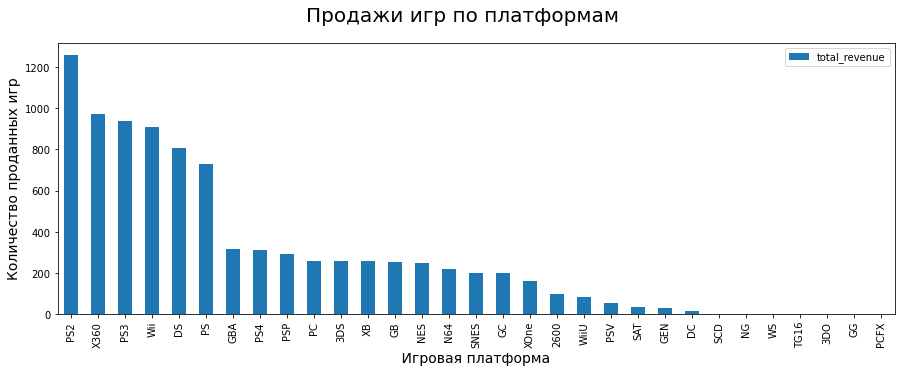

In [27]:
games.pivot_table(index = 'platform',values='total_revenue', aggfunc ='sum'
                 ).sort_values(by='total_revenue',ascending=False).plot(kind='bar', figsize=(15,5))
plt.suptitle('Продажи игр по платформам', fontsize=20)
plt.xlabel(' Игровая платформа ',fontsize=14 )
plt.ylabel('Количество проданных игр',fontsize=14)

Из гистограммы видно что основные получатели дохода - это производители игр для платформ PS2, X360,PS3,Wii,DS, и PS - последнюю мы тоже возьмем - так как выручка и пяти компаниий не считая PS2 примерно на одном уровне, в отличии от платформы GBA.

### Распределение суммарных продаж по топовым платформам

Создадим список помпаний, по которому будем выводить информацию, в цикле будем фильтровать индикаторные значения и необходимые данные, затем группировать даные и стоить по ним график распределения суммарного количества продаж по годам

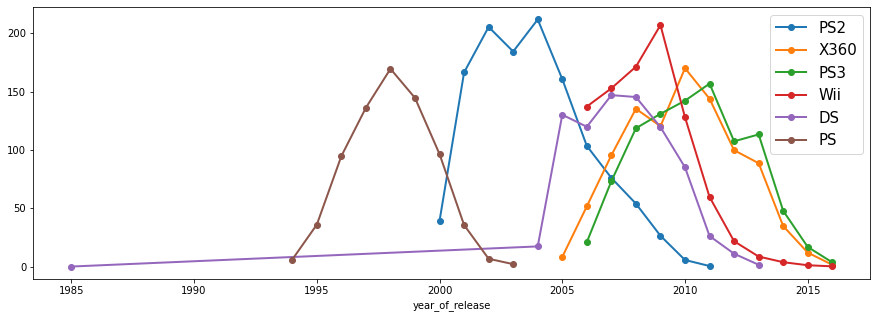

In [28]:
ax = plt.gca()
company = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']
for index in company:
    query = games.query('year_of_release> 0 & platform==@index')
    query.groupby(by='year_of_release')['total_revenue'].sum().plot(label  = index, style ='o-',figsize=(15,5),linewidth=2)
    
ax.legend(company, prop={'size':15})

### Выбор актуального периода

Оценим сроки жизни консолей
- DS - несмотря на то, что первые игры появились на платформе в 1985 году бурный расцвет этой платформы начался только в 2004 году и держался вплоть до 2013 года - 10 лет платформа пользовалась популярностью у производителей игр и игроков
- PS2 - первые игры вышли в 2000 году, резко набрав популярность, в течении 4 лет приносила максимум прибыли - но  с 2004 года пошел спад продаж - пока платформа не прекратила существование в 2011 году - 11 лет срок жизни
- X360 - появилась в 2005 году, когда популярность PS2 начинает падать, медленный и стабильный рост выручки по продажам достигает пика в 2010 году и снижается до ноля к 2016 году время жизни платформы - снова 11 лет
- PS3 - выходит в 2006 году, тогда же когда и Wii, стабильно растут продажи игр в течении 6 лет, достигая максимума в 2011 году, к 2016 году продажи находится на минимальном уровне. Время жизни 10 лет
- Wii - так же появляется в 2006 году, максимум своих продаж достигает за 3 года, и с 2009 года резко теряет популярность и игроков, снижая показатели до минимальных к 2016 году,время жизни 10 лет
- PS - появилась в 1994 году - так же набрав популярность у игроков в течениие 4 лет. Время жизни как и у всех платформ составляет 10 лет

10 лет - именно столько производители платформ и игр сотрудничают друг с другом, скорее всего эта цифра показывает как изменяется прогресс и техническое оснащение платформ, появляются новые более быстрые процессоры и память. Становятся более существенными требования к производительности, и как только выручка из продаж игр начинает снижаться - производитель (на примере PlayStation) начинает разрабатывать номую платформу, выпуская ее в течении 2 лет.

<div class="alert alert-success">
<b>ОТЛИЧНО! 👍</b>

Подтверждаю 7-9-11 лет, как корректный интервал, описывающий средний срок жизни игровой платформы.</div>


### Анализ платформ по актуальному периоду 

Средний срок жизни платформы 10 лет - возьмем 3 года за актуальный период и посмотрим на данные с 2004 до 2016 годы. Создадим датасет, и возьмем данные игр, выпущенных после 2014 года

Text(0, 0.5, 'Количество игр шт.')

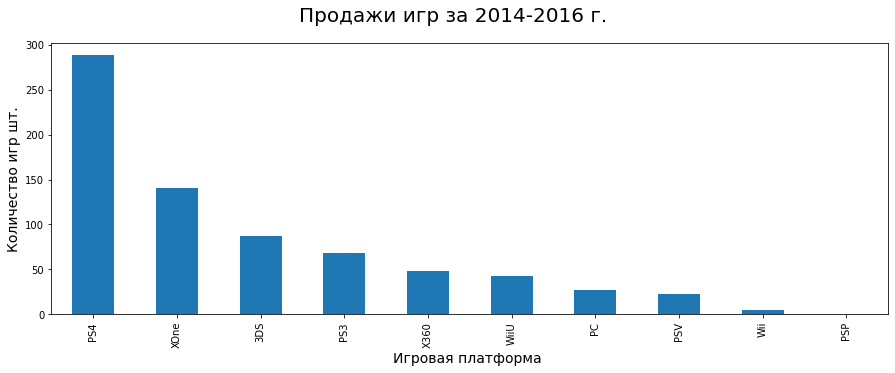

In [29]:
games_after_2014 = games.query('year_of_release>=2014')
games_after_2014.groupby(by='platform'
                        )['total_revenue'].sum().sort_values(ascending=False).plot(kind='bar',figsize = (15,5))
plt.suptitle('Продажи игр за 2014-2016 г. ', fontsize=20)
plt.xlabel('Игровая платформа ',fontsize=14 )
plt.ylabel('Количество игр шт.',fontsize=14)

Если по всем данным лидировала платформа PS2, то по данным за 3 года лидирует PS4

### Анализ продаж по актуальному периоду 

 Взглянем на суммарное количество продаж по платформам по актуальному периоду 

In [30]:
games_pivot = games_after_2014.pivot_table(index=['platform','year_of_release'],values = 'total_revenue',aggfunc='sum').reset_index()

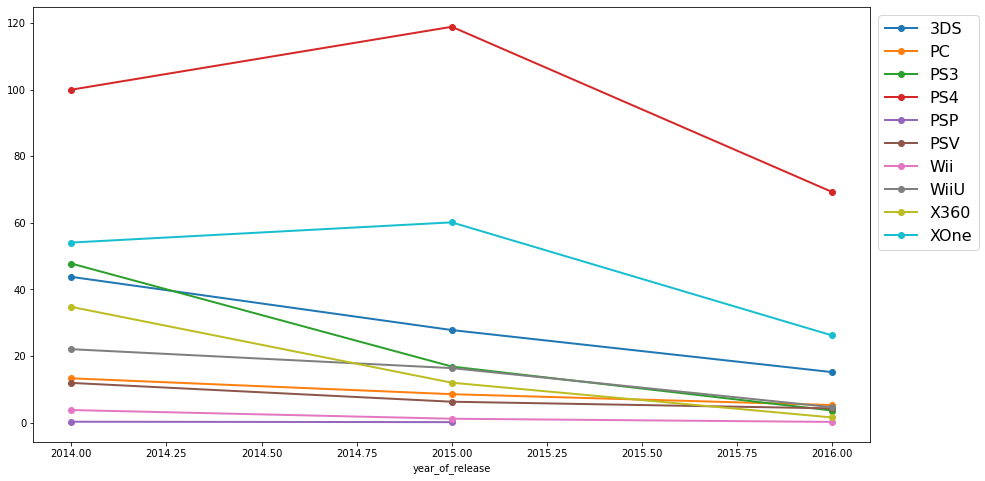

In [62]:
ax = plt.gca()
for index in games_pivot['platform'].unique():
    query = games_pivot.query('platform==@index')
    query.groupby(by='year_of_release')['total_revenue'].sum().plot(label  = index, style ='o-',figsize=(15,8),linewidth=2)
    
ax.legend(games_pivot['platform'].unique(), prop={'size':16},bbox_to_anchor=(1,1));

In [32]:
games_after_2014.query('year_of_release>=2016').pivot_table(index='platform',values='total_revenue',aggfunc='sum').sort_values(by='total_revenue',ascending = False)


,total_revenue
platform,
PS4,69.25
XOne,26.15
3DS,15.14
PC,5.25
WiiU,4.60
PSV,4.25
PS3,3.60
X360,1.52
Wii,0.18


На конец 2016 года лидируют по продажам 3 платформы - PS4, XOne, 3DS. Количество продаж игр по всем платформам снижается. Явным лидером, заметно оторвавшимся по продажам игр является платформа PS4, но и у нее как и у XOne начался спад продаж в 2015 году 

### «Ящик с усами» по глобальным продажам игр в разбивке по платформам

Нарисуем ящик с усами по показателям продаж по данным всего датасета 

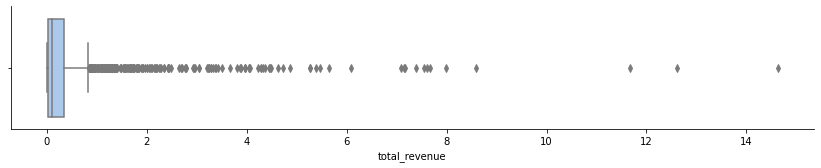

In [33]:
g= sns.catplot( x='total_revenue', kind="box", data=games_after_2014, orient='h', palette = 'pastel')
g.fig.set_figwidth(12)
g.fig.set_figheight(2)

Много выбросов в данных, посмотрим с ограничением вывода значений до 4

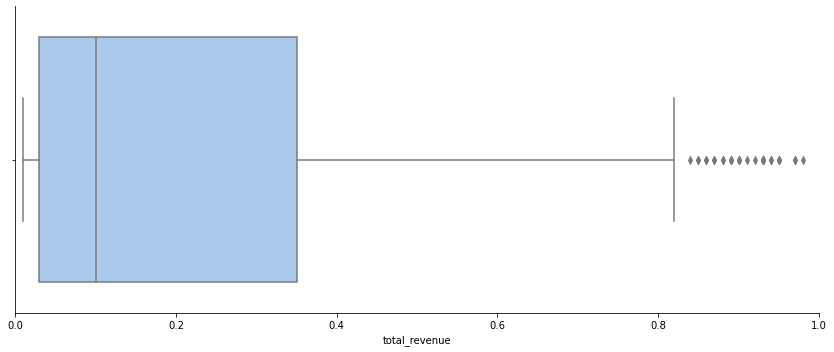

In [34]:
g= sns.catplot( x='total_revenue', kind="box", data=games_after_2014,  palette = 'pastel')
g.fig.set_figwidth(12)
g.set(xlim=(0, 1))

In [35]:
games_after_2014['total_revenue'].describe()

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: total_revenue, dtype: float64

Как видно из графика медианное количество продаж игр составляет 0.08 млн копий, а среднее 0,47 млн

Теперь рассмотрим показатели продаж каждой платформы в отдельности, и построим для них ящик с усами.

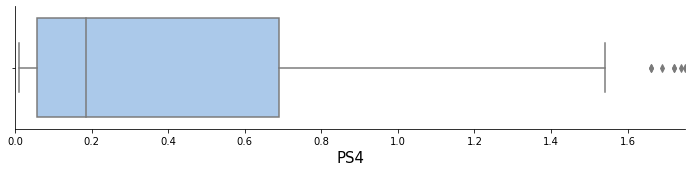

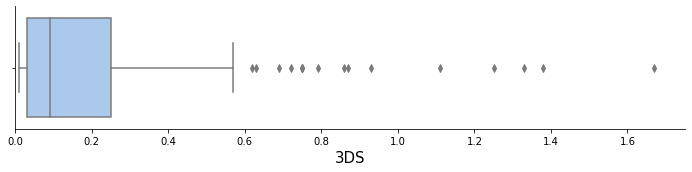

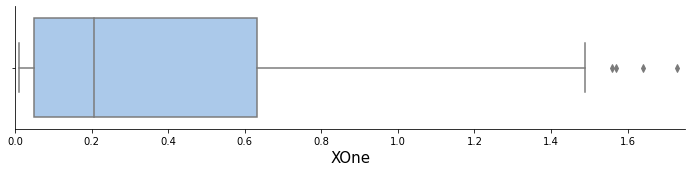

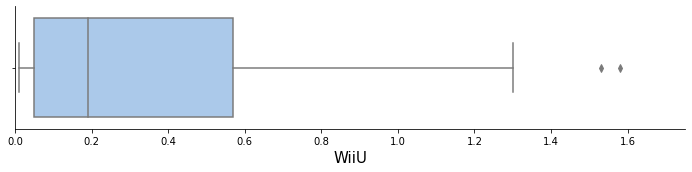

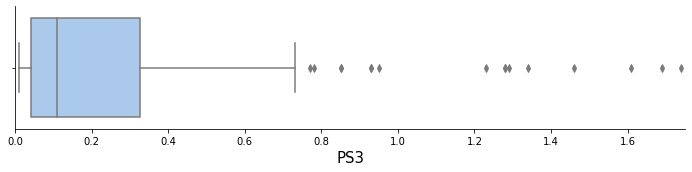

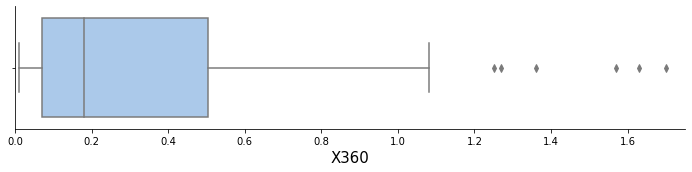

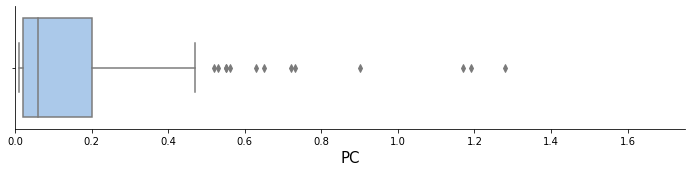

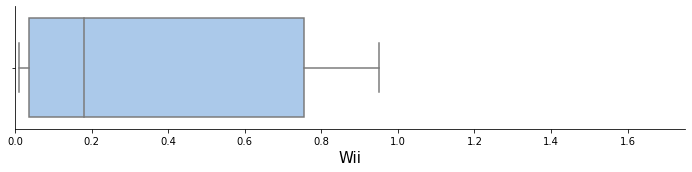

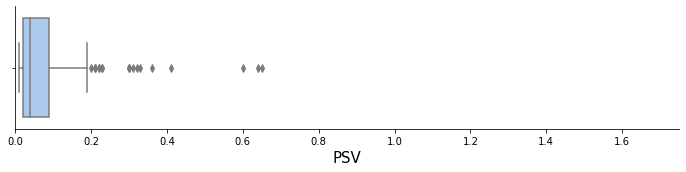

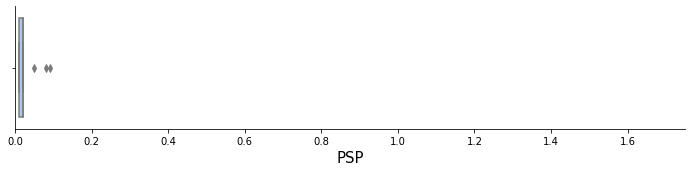

In [36]:
platform = games_after_2014['platform'].unique()
for index in platform:
    query = games_after_2014.query('platform == @index')
    g= sns.catplot( x='total_revenue', kind="box", data=query,  palette = 'pastel',legend=True)
    g.fig.set_figwidth(10)
    g.set(xlim=(0, 1.75))
    g.set_xlabels(index, fontsize=15) #
    g.fig.set_figheight(2)

Построим боксплоты продаж по платформам за 2014-16 годы

Поставим лимиты вывода от 0 до 2


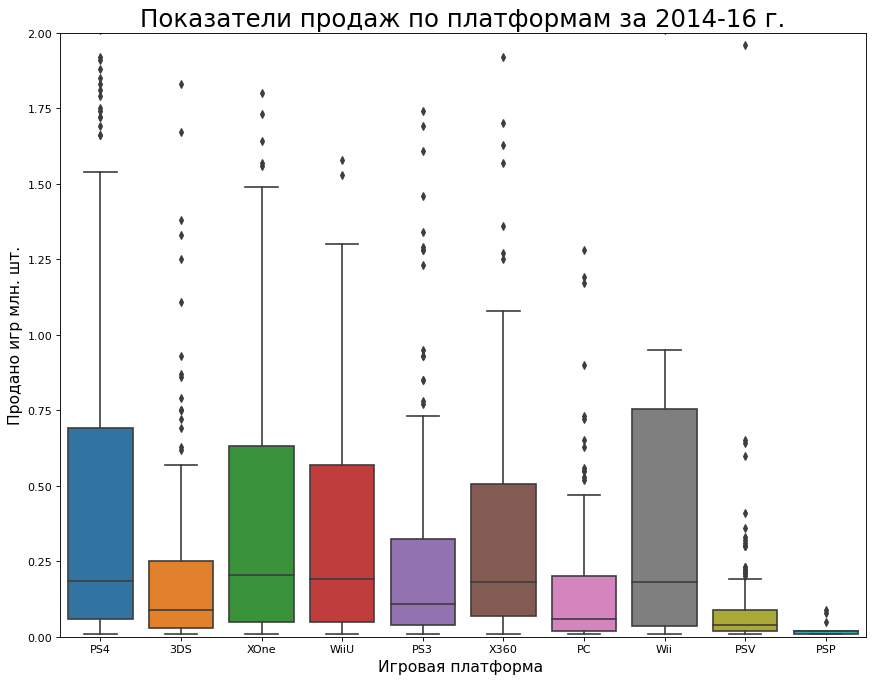

In [37]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_revenue', data=games_after_2014)
plt.title('Показатели продаж по платформам за 2014-16 г.', fontsize=22)
plt.ylim(0,2)
plt.xlabel('Игровая платформа ',fontsize=14 )
plt.ylabel('Продано игр млн. шт.',fontsize=14)
plt.show()

Посмотреть на общую картину с выбросами можно удалив строку ограничением значений

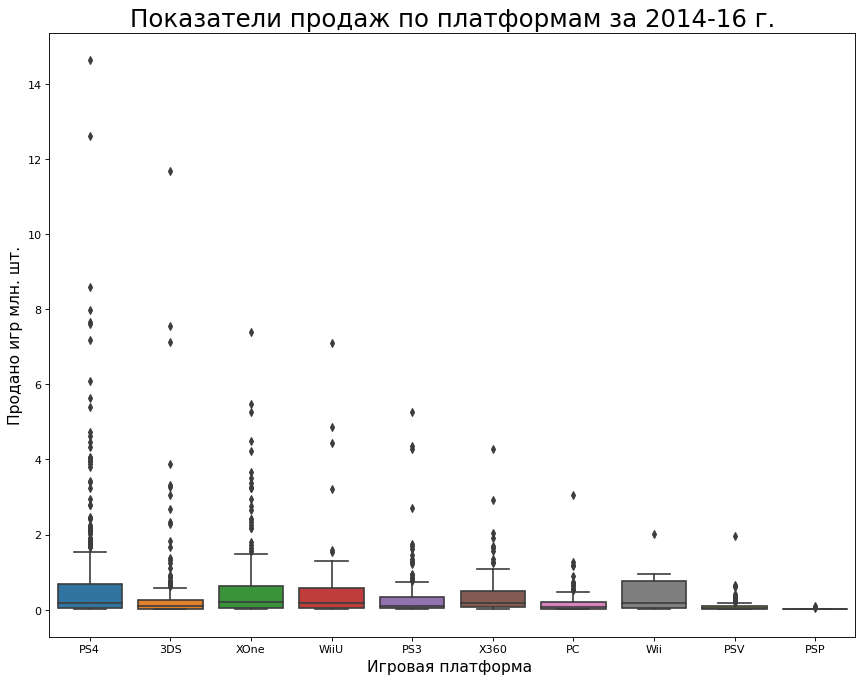

In [38]:
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='platform', y='total_revenue', data=games_after_2014)
plt.title('Показатели продаж по платформам за 2014-16 г.', fontsize=22)
plt.xlabel('Игровая платформа ',fontsize=14 )
plt.ylabel('Продано игр млн. шт.',fontsize=14)
plt.show()

У всех платформ медианные показатели продаже не превышают 0.2 млн копий

### Продажи игр для одной платформы

#### Зависимость продаж от отзывов критиков

Возьмем для анализа PS4, эта платформа больше пользуется популярностью у игроков и  по ней много данных. Сформируем отдельный датасет по платформе PS4 и отфильтруем индикаторные значения по оценкам критиков.

In [39]:
games_PS4_wo_critics = games_after_2014[(
    games_after_2014['platform']== 'PS4') & (games_after_2014['critic_score']>0)]

Построим диаграмму рассеяния зависимости оценки критиков и количества проданных копий игр для Х360

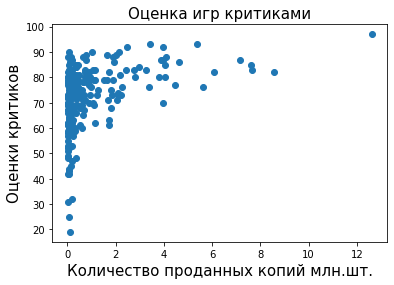

In [63]:
plt.scatter(x=games_PS4_wo_critics['total_revenue'],y=games_PS4_wo_critics['critic_score'])
plt.xlabel('Количество проданных копий млн.шт.', fontsize = 15)
plt.ylabel('Оценки критиков',fontsize = 15)
plt.title('Оценка игр критиками', fontsize=15);

#### Зависимость продаж от отзывов пользователей

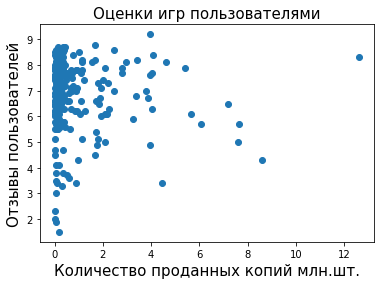

In [64]:
games_PS4_wo_users = games_after_2014[(
    games_after_2014['platform']== 'PS4') & (games_after_2014['user_score']>0)]
plt.scatter(x=games_PS4_wo_users['total_revenue'],y=games_PS4_wo_users['user_score'])
plt.xlabel('Количество проданных копий млн.шт.',fontsize = 15)
plt.ylabel('Отзывы пользователей',fontsize = 15)
plt.title('Оценки игр пользователями', fontsize=15);

 Как видно из диаграммы оценок игр критиками, критики более объективно оценивают игры, наверняка используя какую-то систему оценок различных аспектов игры- вроде графики, геймплея, сюжета. Все это делается профессионалами и  диаграмма это подтверждает, что чем качественнее и интереснее игра - тем она получит выше балл критиков, тем выше у нее шансы на продажу в большем объеме. Если у игры рейтинг критиков меньше 65 то по статистике шансов покупок этой игры более 0.5 млн копий нет.

Диаграмма оценок игр пользователями имеет больше выбросов, например игры с рейтингом ниже 5 имеют продажи по 4-8 млн. копий

Отфильтруем данные рейтингов от индикаторных значений платформы PS4, и построим тепловую карту по коэффициентам корреляции.

In [42]:
games_PS4_wo_users_filter = games_PS4_wo_critics.query(' user_score >0')

<AxesSubplot:>

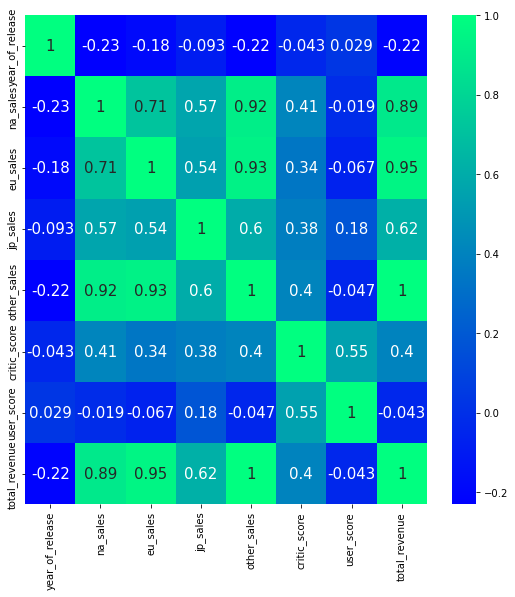

In [43]:
plt.figure(figsize=(9,9))
sns.heatmap(games_PS4_wo_users_filter.corr(), annot=True, cmap='winter', annot_kws={'size':15})

In [44]:
games_PS4_wo_users_filter.corr()[['total_revenue']].sort_values(by='total_revenue',ascending=False)

,total_revenue
total_revenue,1.000000
other_sales,0.998054
eu_sales,0.951783
na_sales,0.892578
jp_sales,0.618891
critic_score,0.401903
user_score,-0.043186
year_of_release,-0.216492


Коэффициент корреляции продаж и оценок пользователей стал отрицательным и составил -0.043, что значит что оценки пользователей никак не взаимосвязаны с показателем продаж.
Оценки критиков демонстрируют прямую, средне-слабую корреляцию с "цифрами" продаж (коэффициент 0.4) 


Взглянем на данные коэффициентов корреляции по остальным популярным игровым платформам. Создадим список платформ, по которым будем проходить циклом, в нем мы будем избавляться от индикаторных значений и будем выбирать только 3 столбца с данными ('total_revenue', 'critic_score', 'user_score'), и по ним считать коэффициенты корреляции.

In [45]:
platforms = ['3DS', 'XOne', 'WiiU', 'PSV', 'PC']
for index in platforms:
    df = games_after_2014[(games_after_2014['platform']== index)]
    query = df.query('critic_score >0 & user_score >0')
    u = query[['total_revenue', 'critic_score', 'user_score']]
    data = u.corr()[['total_revenue']].sort_values(by='total_revenue',ascending=False)
    display (index , data)
    print ('--------------------')

'3DS'

,total_revenue
total_revenue,1.000000
critic_score,0.284686
user_score,0.279850


--------------------


'XOne'

,total_revenue
total_revenue,1.000000
critic_score,0.422112
user_score,-0.091734


--------------------


'WiiU'

,total_revenue
total_revenue,1.000000
user_score,0.411451
critic_score,0.375640


--------------------


'PSV'

,total_revenue
total_revenue,1.000000
critic_score,0.041029
user_score,0.023528


--------------------


'PC'

,total_revenue
total_revenue,1.000000
critic_score,0.172061
user_score,-0.089974


--------------------


По новому актуальному периоду коэффициенты корреляции оценок критиков и пользователей по платформе 3DS оказались равны и имеют средне-слабую корреляцию с "цифрами" продаж (0.28). Самый большой коэффициент у платформы XOne 0.42  рейтинга критиков и продаж. 

### Распределение игр по жанрам.


Посмотрим на общее распределение игр по жанрам. Сгруппируем данные по жанрам, применим функции подсчета количества и суммирования выручки, изменим названия столбцов, чтоб было удобнее по ним строить гистограмму.

In [66]:
ganre_pivot = games_after_2014.pivot_table(index='genre', values = ['total_revenue'], aggfunc=[ 'mean'] )
ganre_pivot.columns = ['mean']
ganre_pivot = ganre_pivot.sort_values(by = 'mean',ascending = False)

Text(0.5, 1.0, 'Продажи игр по жанрам')

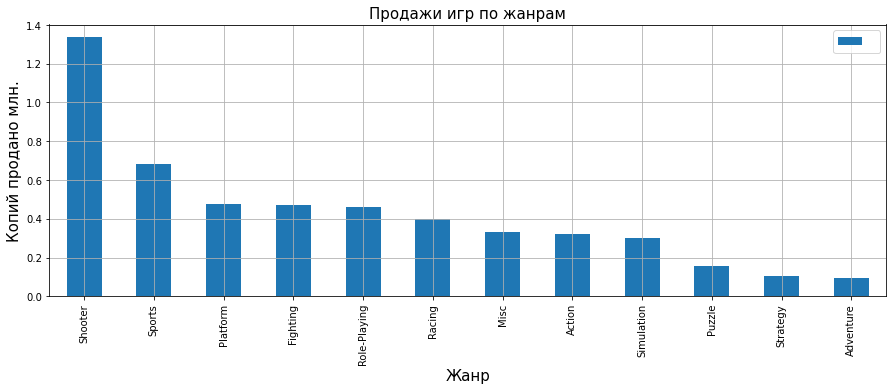

In [67]:
ganre_pivot.plot(kind='bar', figsize=(15,5), width=0.5, grid = True)
plt.legend([' '],prop={'size':12})
plt.xlabel('Жанр',fontsize = 15)
plt.ylabel('Копий продано млн.',fontsize = 15)
plt.title('Продажи игр по жанрам', fontsize=15)

Взяв медианные значения продаж в игровых жанрах мы выяснили, что самым доходным является жанр шутер, затем спортивные симуляторы и гоночные игры. Наиболее прибыльным жанром является шутер, его продажи в два раза больше ближайшего конкурента, и стабильно приносят прибыль компании разработчику. 


### Портрет пользователя каждого региона

Посмотрим на самые популярные платформы (топ-5) пользователей северной Америки, Японии и Европы. Создадим 3 датасета для каждого региона, просуммировав значения продаж по платформам, отсортировав их в убывающем порядке и сохранив только первые 5 строк. Потом объединим все значения в один датасет и по нему построим гистограмму. 

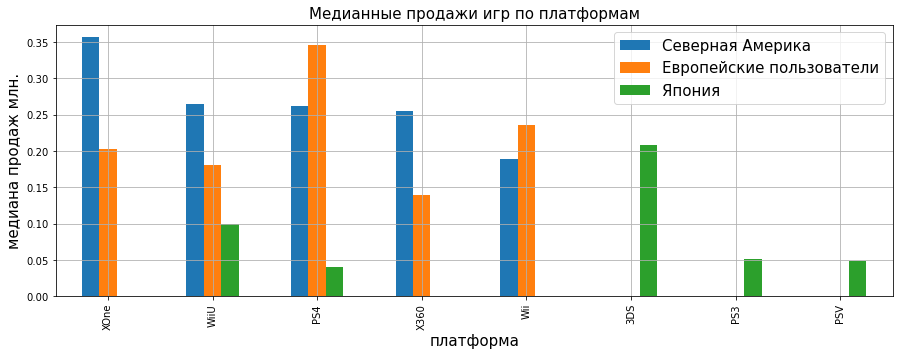

In [68]:
na = games_after_2014.pivot_table(index='platform', values = 'na_sales',aggfunc='mean').sort_values(by='na_sales',ascending=False).head(5)
eu = games_after_2014.pivot_table(index='platform', values = 'eu_sales',aggfunc='mean').sort_values(by='eu_sales',ascending=False).head(5)
jp = games_after_2014.pivot_table(index='platform', values = 'jp_sales',aggfunc='mean').sort_values(by='jp_sales',ascending=False).head(5)
pivot_5 = na.merge(eu,left_on='platform',right_on='platform' ,how = 'outer')
pivot_5 = pivot_5.merge(jp,left_on='platform',right_on='platform' ,how = 'outer').plot(kind='bar', figsize = (15,5),grid=True)
plt.legend(['Северная Америка', 'Европейские пользователи', 'Япония'],prop={'size':15})
plt.xlabel('платформа',fontsize = 15)
plt.ylabel('медиана продаж млн.',fontsize = 15)
plt.title('Медианные продажи игр по платформам', fontsize=15);

 Как видим по новому актуальному периоду и используя медианый показатель продаж игр явным лидером у американских игроков является платформа XOne, у европейских игроков наиболее прибыльной платформой является PS4. Японские игроки предпочитают платформу 3DS. Как видим игроки различных континентов предпочитаю разные платформы, но в пятерке всех локаций пользователей присутствует платформа WiiU.

Хоть японские пользователи и являются аутсайдерами по купленным играм, но сама Япония держится молодцом, так как и PlayStation и Wii и DS, SNES, 3DS все это японские производители, и во всем этом японском разнообразии обособленно держится единственный представитель американского производителя - X360, с максимальным количеством игр, приобретенными американцами.

###  Популярные жанры по регионам

Самые популярные жанры (топ-5)пользователей северной Америки, Японии и Европы.

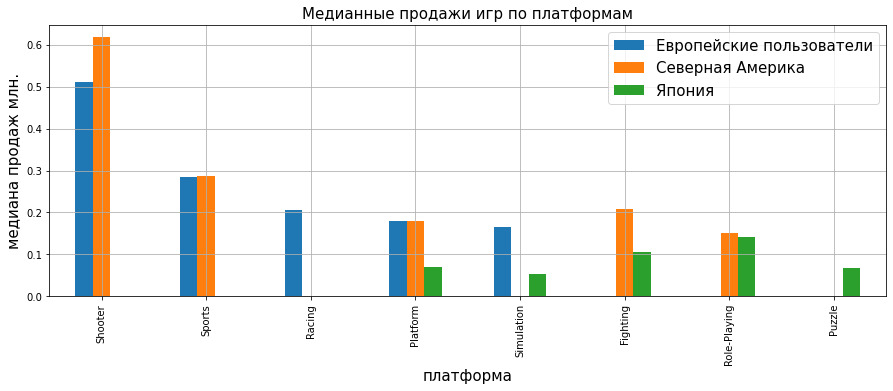

In [69]:
g_ne = games_after_2014.pivot_table(index='genre', values = 'na_sales',aggfunc='mean').sort_values(by='na_sales',ascending=False).head(5)
g_eu = games_after_2014.pivot_table(index='genre', values = 'eu_sales',aggfunc='mean').sort_values(by='eu_sales',ascending=False).head(5)
g_jp = games_after_2014.pivot_table(index='genre', values = 'jp_sales',aggfunc='mean').sort_values(by='jp_sales',ascending=False).head(5)
g_pivot_5 = g_eu.merge(g_ne,left_on='genre',right_on='genre' ,how = 'outer')
g_pivot_5 = g_pivot_5.merge(g_jp,left_on='genre',right_on='genre' ,how = 'outer').plot(kind='bar', figsize = (15,5), grid = True)
plt.legend(['Европейские пользователи', 'Северная Америка', 'Япония'],prop={'size':15})
plt.xlabel('платформа',fontsize = 15)
plt.ylabel('медиана продаж млн.',fontsize = 15)
plt.title('Медианные продажи игр по платформам', fontsize=15);

Жанр шутер приобладает по медианным продажам в двух регионах - американском и европейском, в среднем этот жанр приносит в два раза больше прибыли нежели спортивные жанры игр (на втором месте по популярности). Отдельно держатся японские игроки, которые больше предпочитают ролевые игры, файтинги и платформенные игры.


### Значение рейтинга ESRB

Выясним если ли зависимость рейтинаг ESRB на продажи в отдельном регионе?

Так же сгруппируем данные по каждому региону, объединим их и построим по ним гистограмму.

In [52]:

ESRB_ne = games_after_2014.pivot_table(index='ESRB_description', values = 'na_sales',aggfunc='sum'
                                      ).sort_values(by='na_sales',ascending=False).head(6)

ESRB_eu = games_after_2014.pivot_table(index='ESRB_description', values = 'eu_sales',aggfunc='sum'
                                      ).sort_values(by='eu_sales',ascending=False).head(6)

ESRB_jp = games_after_2014.pivot_table(index='ESRB_description', values = 'jp_sales',aggfunc='sum'
                                      ).sort_values(by='jp_sales',ascending=False).head(6)

pivot_ESRB = ESRB_eu.merge(ESRB_ne,left_on='ESRB_description',right_on='ESRB_description' ,how = 'outer')

pivot_ESRB = pivot_ESRB.merge(ESRB_jp,left_on='ESRB_description',right_on='ESRB_description' ,how = 'outer')                   

Text(0.5, 1.0, 'Зависимость продаж от рейтинга ESRB')

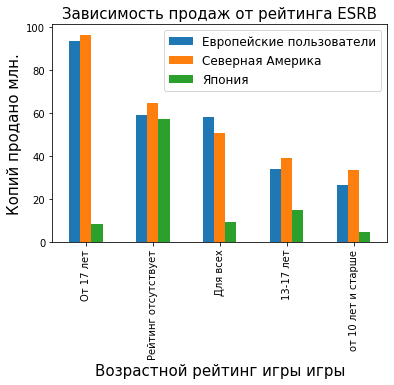

In [53]:
pivot_ESRB.plot(kind='bar',fontsize=10)
plt.legend(['Европейские пользователи', 'Северная Америка', 'Япония'],prop={'size':13})
plt.legend(['Европейские пользователи', 'Северная Америка', 'Япония'],prop={'size':12})
plt.xlabel('Возрастной рейтинг игры игры',fontsize = 15)
plt.ylabel('Копий продано млн.',fontsize = 15)
plt.title('Зависимость продаж от рейтинга ESRB', fontsize=15)

Как видно у европейских и американских игроков наибольшей популярностью пользуются игры с возрастным ограничением от 17 лет, на втором месте стоят игры, в которых рейтинг отсутствует(у японских пользователей такие игры находятся на первом месте). Данные игры без рейтинга продаются в больших объемах. Отсутствие рейтинга может быть связано с работой самого рейтингового агенства, датой начала его работы, игры каких регионов это агенство определяет. Вполне возможно что у японии есть свое рейтинговое агенство компьютерных игр. Игр с отсутствующими данными по рейтингам очень много и эти данные могут поменять статистику зависимости продаж от рейтинга игры. 
    Так же подозрительно смотрится то, что количество проданных копий по играм, у которых отсутствует рейтинг примерно одинаковый для разных локаций.


Как видим категория игр с рейтингом "для всех" занимает лидирующую позицию по продажам в каждом регионе, больше всего игроков предпочитают игры именно с этим рейтингом, вторые и третьи места по рейтиргу игр ESRB занимают игры для подростков и молодых людей от 17 лет. Игры для детей от 10 лет замыкают самые популярные рейтирги игр, остальные рейтинги настолько незначительны, что даже не отображаются на графике. 

## Проверка  гипотез


### Равенство  пользовательских рейтингов

За нулевую гипотезу примем равенство средних пользовательских рейтингов по платформам Xbox One и PC. Альтернативной гипотезой станет неравенство средних. Используем метод scipy.stats.ttest_ind (array1, array2, equal_var = False). Который используется для проверки гипотез равенства средних двух совокупностей. False применим из-за неясности равенства дисперсий. Критический уровень значимости возьмем 0.05

Сформируем два списка с данными рейтингов пользователей, отфильтрованными по платформам и ненулевым значениям.

In [54]:
mean_xbox = games_after_2014.query('(platform=="XOne") & (user_score>0)')['user_score']
mean_pc = games_after_2014.query('(platform=="PC") & (user_score>0)')['user_score']

In [55]:
alpha = .05
results = st.ttest_ind(mean_xbox, mean_pc, equal_var = False )
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


Гипотезу о равенстве средних рейтингов пользователей по двум платформам мы не отклоняем, так как значение pvalue выше критического уровня значимости. Вероятность ошибки первого рода при отклонении гипотезы очень большая. C вероятностью в 11% такое или большее различие между средними рейтингами можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними оценками пользователей.Можем проверить значения средних.
    

In [56]:
print('Средняя оценка пользователей для платформы XOne {:.2f}'.format(mean_xbox.mean()))
print('Средняя оценка пользователей для платформы PC {:.2f}'.format(mean_pc.mean()))

Средняя оценка пользователей для платформы XOne 6.59
Средняя оценка пользователей для платформы PC 6.30


###  Разность пользовательских рейтингов

Средние пользовательские рейтинги жанров Action и Sports разные.

За нулевую гипотезу возьмем равенство средних пользовательских рейтингов по жанрам. Альтернативной гипотезой станет их неравенство.

In [57]:
mean_action = games_after_2014.query('(genre=="Action") & (user_score>0)')['user_score']
mean_sports = games_after_2014.query('(genre=="Sports") & (user_score>0)')['user_score']

In [58]:
alpha = .05
results = st.ttest_ind(mean_action, mean_sports, equal_var = False )
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [59]:
print('Средняя оценка пользователей для жанра Action {:.2f}'.format(mean_action.mean()))
print('Средняя оценка пользователей для жанра Sports {:.2f}'.format(mean_sports.mean()))

Средняя оценка пользователей для жанра Action 6.76
Средняя оценка пользователей для жанра Sports 5.23


Мы отвергаем нашу нулевую гипотезу о равенстве средних значений, значение pvalue меньше 5%, а это значит что существует очень маленькая вероятность ошибки при отклонении гипотезы. Данные альтернативной  гипотезе не противоречат, и у нас появляется основание утверждать о неравенстве средних оценок пользователей  жанров Action и Sports

## Выводы:

Выводы:
* Взяв медианные данные продаж по актуальному периоду мы выяснили что жанр шутеров превышает по продажам в два раза все остальные жанры игр и лидирует с медианных показателем 1.3 млн.
* Основной игровой платформой является PS4 
* По некоторым платформам появилась отрицательная корреляция оценок пользователей к показателям продаж
* Игроки разных локаций предпочитаю разные платформы( американцы XOne, европейцы PS4, японцы 3DS
* У американцев и европейцев лидирует жанр шутер, японцы предпочитают ролевые игры
* По рейтингу ESRB лидируют продажи игр с рейтингом от 17 лет у европейских и американских игроков
* Однако в японии лидируют игры, у которых рейтинг не проставлен, возможно данное рейтинговое агентство не анализирует игры других стран, не популярных платформ, или какой-то определенной группы пользователей 
* На  втором месте по европейским и американским продажам игр, находятся игры у которых так же отсутствует рейтинг, это значит что достаточно много пользователей играют в игры, которое это агентство не оценивает.
* По сравнению средних пользовательских рейтингов платформ Xbox One и PC выяснилось, что мы не можем отвергнуть гипотезу о их равенстве.
* Нулевую гипотезу о равенстве средних пользовательских рейтингов жанров Action и Sports мы отклонили, потому что pvalue  намного меньше критического уровня значимости. Соответственно альтернативную гипотезу о значимой разности средних рейтингов мы не отвергаем. 
  